In [ ]:
!pip install pymatgen
!pip install pubchempy
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.0/809.0 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13818 sha256=74257704fea63146db101e5b192915dec3cd14c011629d316185d0af5ccf86d2
  Stored in directory: /root/.cache/pip/wheels/8b/e3/6c/3385b2db08b0985a87f5b117f98d0cb61a3ae3ca3bcbbd8307
Successfully built pubchempy
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import requests
import pubchempy as pcp
import numpy as np

from rdkit.Chem import Descriptors, PandasTools, MolFromSmiles
from rdkit import Chem

In [46]:
df = pd.read_csv("data_practice.csv")
df

,smiles,A,B,C,mu,alpha,homo,lumo,gap,r2,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,N#CC12CC1CO2,5.99438,2.27301,1.94738,4.5933,55.81,-0.2627,-0.0086,0.2541,650.3290,...,0,0,0,0,0,0,0,0,0,0
1,COCC(O)C#CC=O,2.32923,0.75737,0.59946,3.4068,77.34,-0.2697,-0.0657,0.2040,1808.5114,...,0,0,0,0,0,0,0,0,0,0
2,COC1C2CC(=NO)C12,2.71950,1.23126,1.02616,1.2920,76.75,-0.2258,0.0156,0.2414,1215.4323,...,0,0,0,0,0,0,0,0,0,0
3,CC(CC=O)OCC#C,2.29944,0.85305,0.65285,3.1488,79.50,-0.2438,-0.0199,0.2239,1685.1071,...,0,0,0,1,0,0,0,0,0,0
4,COC(=N)N1CCC1=N,3.03493,1.26316,0.90731,1.9135,77.81,-0.2343,0.0056,0.2400,1271.6972,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,C1CC1(CCC#N)C=O,2.81953,0.95253,0.78315,5.6157,77.77,-0.2667,-0.0340,0.2328,1442.5369,...,0,0,0,0,0,0,0,0,0,0
4996,CCN1C2CC3OC2C13,4.22393,1.23139,1.15079,1.2093,78.14,-0.2139,0.0760,0.2898,1141.0494,...,0,0,0,0,0,0,0,0,0,0
4997,CN1C2CC(O)CC12C,2.40023,1.44261,1.26824,2.0425,81.95,-0.2130,0.0709,0.2839,1145.1258,...,0,0,0,0,0,0,0,0,0,0
4998,c1cnc([nH]1)OC=O,8.05652,1.25277,1.08801,4.1565,58.08,-0.2300,-0.0153,0.2147,988.9973,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df1 = df.drop(df.select_dtypes(include=['object']).columns, axis=1)
df1

,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,5.99438,2.27301,1.94738,4.5933,55.81,-0.2627,-0.0086,0.2541,650.3290,0.090625,...,0,0,0,0,0,0,0,0,0,0
1,2.32923,0.75737,0.59946,3.4068,77.34,-0.2697,-0.0657,0.2040,1808.5114,0.131823,...,0,0,0,0,0,0,0,0,0,0
2,2.71950,1.23126,1.02616,1.2920,76.75,-0.2258,0.0156,0.2414,1215.4323,0.146098,...,0,0,0,0,0,0,0,0,0,0
3,2.29944,0.85305,0.65285,3.1488,79.50,-0.2438,-0.0199,0.2239,1685.1071,0.154138,...,0,0,0,1,0,0,0,0,0,0
4,3.03493,1.26316,0.90731,1.9135,77.81,-0.2343,0.0056,0.2400,1271.6972,0.147974,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.81953,0.95253,0.78315,5.6157,77.77,-0.2667,-0.0340,0.2328,1442.5369,0.146377,...,0,0,0,0,0,0,0,0,0,0
4996,4.22393,1.23139,1.15079,1.2093,78.14,-0.2139,0.0760,0.2898,1141.0494,0.172360,...,0,0,0,0,0,0,0,0,0,0
4997,2.40023,1.44261,1.26824,2.0425,81.95,-0.2130,0.0709,0.2839,1145.1258,0.194093,...,0,0,0,0,0,0,0,0,0,0
4998,8.05652,1.25277,1.08801,4.1565,58.08,-0.2300,-0.0153,0.2147,988.9973,0.084993,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Вычисление дисперсии для каждого столбца
variance = df1.var()

# Вывод результата
print(variance)

A                    1.807007
B                    0.207368
C                    0.112721
mu                   2.299563
alpha               63.592403
                      ...    
fr_thiazole          0.000000
fr_thiocyan          0.000000
fr_thiophene         0.000000
fr_unbrch_alkane     0.013511
fr_urea              0.008528
Length: 229, dtype: float64


In [49]:
# # Вычисляем дисперсию для каждого столбца
variance = df1.var()
columns = df1.columns

# Определяем столбцы, если их дисперсия превышает порог
to_drop = [column for column in variance.index if variance[column] < 0.05]

df1=df1.drop(to_drop, axis=1)
df1

,A,B,C,mu,alpha,r2,u0,u298,h298,g298,...,fr_aryl_methyl,fr_bicyclic,fr_epoxide,fr_ether,fr_ketone,fr_ketone_Topliss,fr_methoxy,fr_nitrile,fr_piperdine,fr_term_acetylene
0,5.99438,2.27301,1.94738,4.5933,55.81,650.3290,-323.338627,-323.332830,-323.331885,-323.368166,...,0,1,0,1,0,0,0,1,0,0
1,2.32923,0.75737,0.59946,3.4068,77.34,1808.5114,-458.914682,-458.903948,-458.903004,-458.952489,...,0,0,0,1,0,0,1,0,0,0
2,2.71950,1.23126,1.02616,1.2920,76.75,1215.4323,-438.996978,-438.988148,-438.987204,-439.030829,...,0,1,0,1,0,0,1,0,0,0
3,2.29944,0.85305,0.65285,3.1488,79.50,1685.1071,-422.988608,-422.977883,-422.976938,-423.026195,...,0,0,0,1,0,0,0,0,0,1
4,3.03493,1.26316,0.90731,1.9135,77.81,1271.6972,-435.272093,-435.262958,-435.262014,-435.306724,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.81953,0.95253,0.78315,5.6157,77.77,1442.5369,-401.969669,-401.960439,-401.959495,-402.004365,...,0,0,0,0,0,0,0,1,0,0
4996,4.22393,1.23139,1.15079,1.2093,78.14,1141.0494,-403.082393,-403.074974,-403.074030,-403.114261,...,0,0,0,1,0,0,0,0,0,0
4997,2.40023,1.44261,1.26824,2.0425,81.95,1145.1258,-404.332161,-404.322884,-404.321940,-404.365564,...,0,1,0,0,0,0,0,0,1,0
4998,8.05652,1.25277,1.08801,4.1565,58.08,988.9973,-414.713710,-414.706937,-414.705993,-414.745694,...,0,0,0,1,0,0,0,0,0,0


In [50]:
from sklearn.preprocessing import StandardScaler
cols = df1.columns

sc = StandardScaler()
X_std = sc.fit_transform(df1[cols].values)
X_std

array([[ 1.94455109,  1.91818951,  2.45854935, ...,  2.39814205,
        -0.2314757 , -0.33718407],
       [-0.78226161, -1.41046755, -1.5566255 , ..., -0.36724316,
        -0.2314757 , -0.33718407],
       [-0.491907  , -0.36970768, -0.28557447, ..., -0.36724316,
        -0.2314757 , -0.33718407],
       ...,
       [-0.72943875,  0.09446038,  0.43553177, ..., -0.36724316,
         2.0694756 , -0.33718407],
       [ 3.47875011, -0.32246729, -0.10133611, ..., -0.36724316,
        -0.2314757 , -0.33718407],
       [-0.44139049, -0.08321265, -0.44955703, ..., -0.36724316,
        -0.2314757 , -0.33718407]])

In [51]:
# Вычисление корреляции
correlation_matrix = df1.corr()
print("Корреляционная матрица:")
correlation_matrix

Корреляционная матрица:


,A,B,C,mu,alpha,r2,u0,u298,h298,g298,...,fr_aryl_methyl,fr_bicyclic,fr_epoxide,fr_ether,fr_ketone,fr_ketone_Topliss,fr_methoxy,fr_nitrile,fr_piperdine,fr_term_acetylene
A,1.000000,-0.191508,-0.063199,0.037642,-0.246926,0.152112,0.250710,0.250705,0.250705,0.250709,...,0.010063,-0.093097,0.006172,-0.025659,-0.055057,-0.053729,0.000147,-0.012005,-0.024244,0.012586
B,-0.191508,1.000000,0.903886,-0.089370,-0.456350,-0.852780,0.309636,0.309616,0.309616,0.309670,...,0.023320,0.266439,-0.017926,0.007649,0.008443,-0.000832,-0.145241,-0.093725,0.185207,-0.103325
C,-0.063199,0.903886,1.000000,-0.155691,-0.431111,-0.848306,0.406688,0.406667,0.406667,0.406722,...,-0.084920,0.342371,0.007996,0.058612,-0.008158,-0.010228,-0.156131,-0.089531,0.247197,-0.102962
mu,0.037642,-0.089370,-0.155691,1.000000,-0.249132,0.030935,-0.276164,-0.276166,-0.276166,-0.276163,...,0.025223,-0.113934,-0.061043,-0.147449,0.101879,0.081498,-0.058135,0.350209,-0.024576,-0.085746
alpha,-0.246926,-0.456350,-0.431111,-0.249132,1.000000,0.537777,0.254065,0.254084,0.254084,0.254041,...,0.024219,-0.008570,-0.073132,-0.147942,-0.096568,-0.100612,0.047888,-0.065324,-0.027228,0.128230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_ketone_Topliss,-0.053729,-0.000832,-0.010228,0.081498,-0.100612,-0.001119,-0.104828,-0.104828,-0.104828,-0.104830,...,-0.071357,-0.003917,0.006047,-0.074614,0.961628,1.000000,-0.036608,-0.057580,0.024899,-0.004451
fr_methoxy,0.000147,-0.145241,-0.156131,-0.058135,0.047888,0.194485,-0.113401,-0.113394,-0.113394,-0.113411,...,-0.021816,-0.087767,-0.054553,0.320533,-0.035121,-0.036608,1.000000,-0.026806,-0.051894,-0.005375
fr_nitrile,-0.012005,-0.093725,-0.089531,0.350209,-0.065324,0.050276,0.073576,0.073578,0.073578,0.073570,...,-0.061316,-0.103694,-0.036085,-0.106076,-0.064436,-0.057580,-0.026806,1.000000,-0.026468,-0.010197
fr_piperdine,-0.024244,0.185207,0.247197,-0.024576,-0.027228,-0.191842,0.102282,0.102274,0.102274,0.102293,...,-0.053989,0.239747,-0.044914,-0.124308,0.018480,0.024899,-0.051894,-0.026468,1.000000,-0.041899


In [52]:
from sklearn.preprocessing import StandardScaler
cols = df1.columns

sc = StandardScaler()
X_std = sc.fit_transform(df1[cols].values)
X_std

array([[ 1.94455109,  1.91818951,  2.45854935, ...,  2.39814205,
        -0.2314757 , -0.33718407],
       [-0.78226161, -1.41046755, -1.5566255 , ..., -0.36724316,
        -0.2314757 , -0.33718407],
       [-0.491907  , -0.36970768, -0.28557447, ..., -0.36724316,
        -0.2314757 , -0.33718407],
       ...,
       [-0.72943875,  0.09446038,  0.43553177, ..., -0.36724316,
         2.0694756 , -0.33718407],
       [ 3.47875011, -0.32246729, -0.10133611, ..., -0.36724316,
        -0.2314757 , -0.33718407],
       [-0.44139049, -0.08321265, -0.44955703, ..., -0.36724316,
        -0.2314757 , -0.33718407]])

In [53]:
FILTER_THRESHOLD = 0.7
cov_mat =np.cov(X_std.T)
cov_mat_df = pd.DataFrame(cov_mat, columns=cols)

upper_tri = cov_mat_df.where(
    np.triu(
        np.ones(cov_mat_df.shape), k=1).astype(np.bool_)
        )

to_drop_cor = [column for column in upper_tri.columns if any(abs(upper_tri[column]) > FILTER_THRESHOLD)]

df1 = df1.drop(to_drop_cor, axis=1)
df1

,A,B,mu,alpha,u0,cv,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,SPS,...,fr_NH1,fr_aldehyde,fr_allylic_oxid,fr_amide,fr_aryl_methyl,fr_bicyclic,fr_epoxide,fr_ketone,fr_methoxy,fr_piperdine
0,5.99438,2.27301,4.5933,55.81,-323.338627,21.459,8.311944,0.263889,-0.263889,53.857143,...,0,0,0,0,0,1,0,0,0,0
1,2.32923,0.75737,3.4068,77.34,-458.914682,35.183,9.588026,0.139722,-0.847037,11.333333,...,0,1,0,0,0,0,0,0,1,0
2,2.71950,1.23126,1.2920,76.75,-438.996978,32.710,8.328809,0.371204,0.371204,50.333333,...,0,0,0,0,0,1,0,0,1,0
3,2.29944,0.85305,3.1488,79.50,-422.988608,36.895,9.846767,0.043009,-0.043009,12.000000,...,0,1,0,0,0,0,0,0,0,0
4,3.03493,1.26316,1.9135,77.81,-435.272093,32.448,7.125972,0.075231,0.075231,17.000000,...,2,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.81953,0.95253,5.6157,77.77,-401.969669,33.153,10.285547,0.059792,-0.059792,20.333333,...,0,1,0,0,0,0,0,0,0,0
4996,4.22393,1.23139,1.2093,78.14,-403.082393,30.043,5.502454,0.638843,0.638843,61.000000,...,0,0,0,0,0,0,0,0,0,0
4997,2.40023,1.44261,2.0425,81.95,-404.332161,36.045,9.186319,0.017407,-0.017407,63.666667,...,0,0,0,0,0,1,0,0,0,1
4998,8.05652,1.25277,4.1565,58.08,-414.713710,23.621,9.590000,0.222222,0.222222,8.500000,...,1,0,0,0,0,0,0,0,0,0


In [54]:
y=df[['gap']]
x=df1

In [55]:
import warnings
warnings.filterwarnings("ignore")

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import seaborn as sns

# деление данных на обучанющие и тестовые выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [57]:
from sklearn.preprocessing import MinMaxScaler

# нормировка
sc = MinMaxScaler(feature_range=(0, 1))
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

r2_score: 0.9024496865842304
Mean Absolute Error: 0.011038501000000001
Mean Squared Error: 0.00022329106553500006
Root Mean Squared Error: 0.014942926940027515
RandomForestRegressor()
r_score: 0.9499735188857795
r2_score: 0.9860296345066314
Mean Absolute Error: 0.0039301160000000035
Mean Squared Error: 3.18407443735e-05
Root Mean Squared Error: 0.005642760350528808
RandomForestRegressor()
r_score: 0.992990248948413


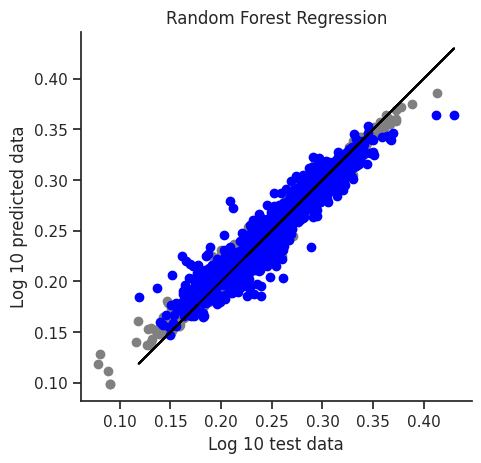

In [58]:
regressor = RandomForestRegressor() #модель регрессии, основанная на методе случайного леса
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y1_pred = regressor.predict(x_train)
# metrics

print('r2_score:', metrics.r2_score(y_test, y_pred)) #реальные данные
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(regressor)
print('r_score:', np.sqrt(metrics.r2_score(y_test, y_pred)))

print('r2_score:', metrics.r2_score(y_train, y1_pred))  #тренировочные данные
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
print(regressor)
print('r_score:', np.sqrt(metrics.r2_score(y_train, y1_pred)))
plt.scatter(y_train, y1_pred, color='gray')
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='black')
plt.title('Random Forest Regression')
plt.xlabel('Log 10 test data')
plt.ylabel('Log 10 predicted data')
# plt.xlim(-2, 2)
# plt.ylim(-1, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

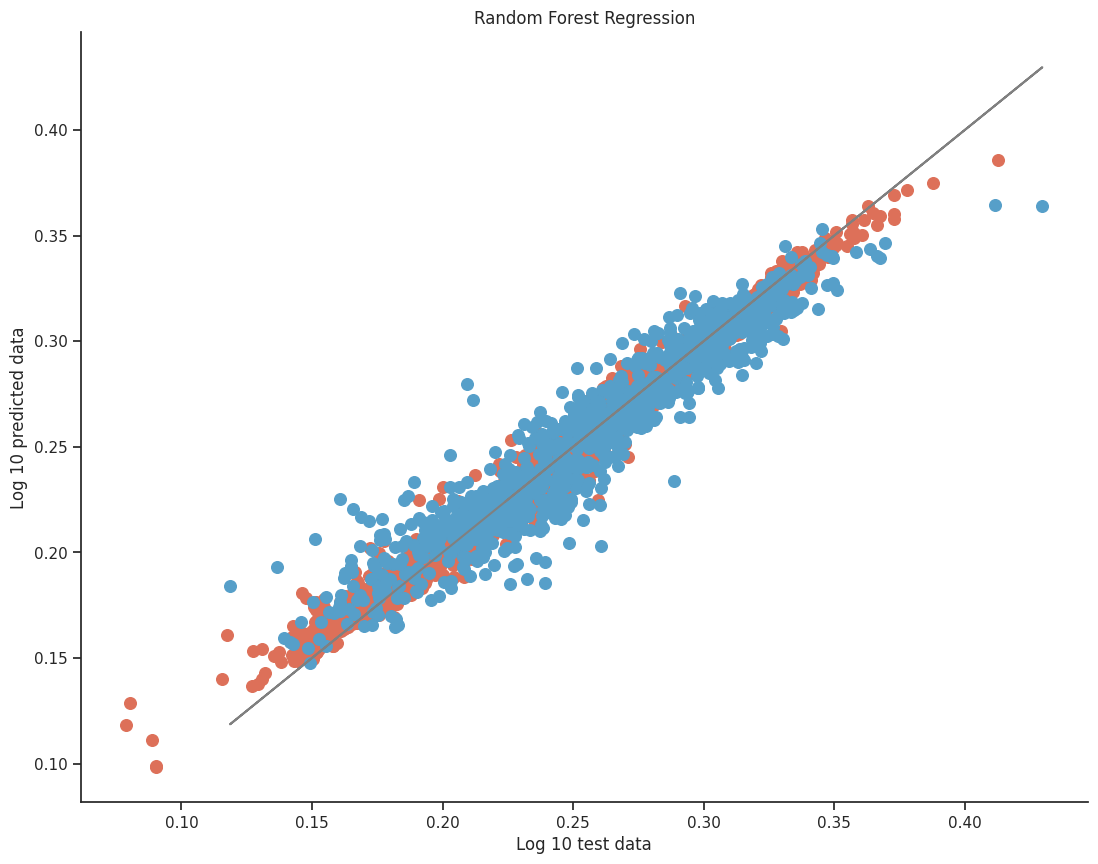

In [59]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
f, ax = plt.subplots(figsize=(13, 10))
plt.scatter(y_train, y1_pred, color='#DD7059', s=70)
plt.scatter(y_test, y_pred, color='#569FC9',s=70)
plt.plot(y_test, y_test, color='gray')
#plt.plot(x, x, color='black')
#plt.title('Random Forest Regression')
plt.title('Random Forest Regression')
plt.xlabel('Log 10 test data')
plt.ylabel('Log 10 predicted data')
# plt.xlim(-4, 4)
# plt.ylim(-4, 4)
plt.show()
ax.figure.savefig("regKm0.png",transparent=True, dpi=1200)

In [ ]:
!pip install shap

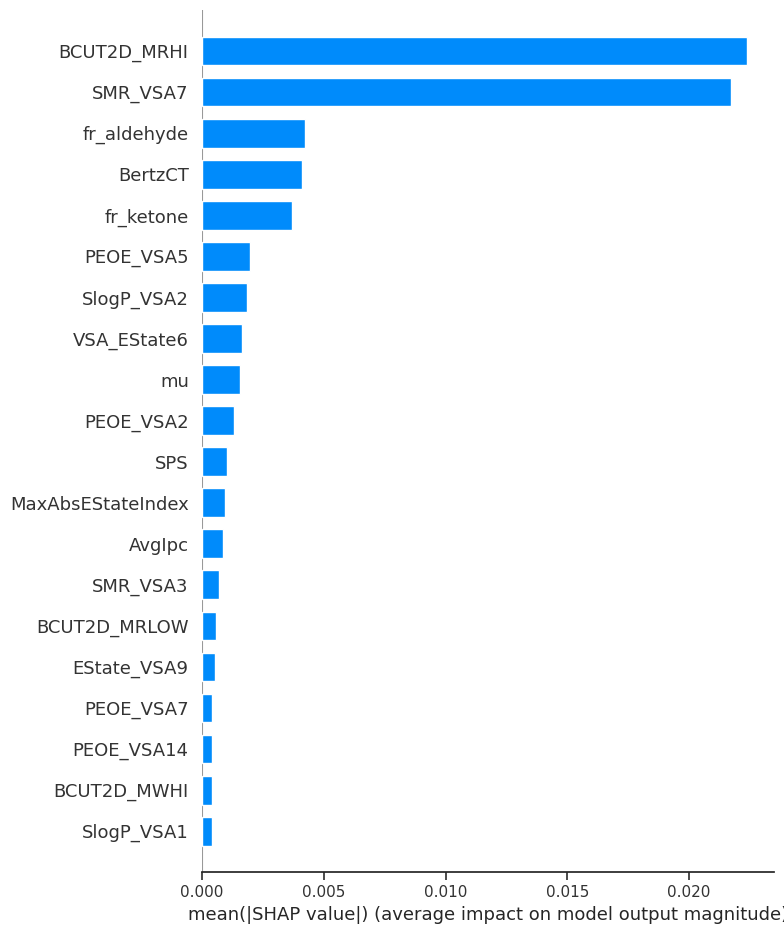

In [ ]:
import shap
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(x_test)
f, ax = plt.subplots(figsize=(13, 10))
shap.summary_plot(shap_values, x, plot_type="bar")

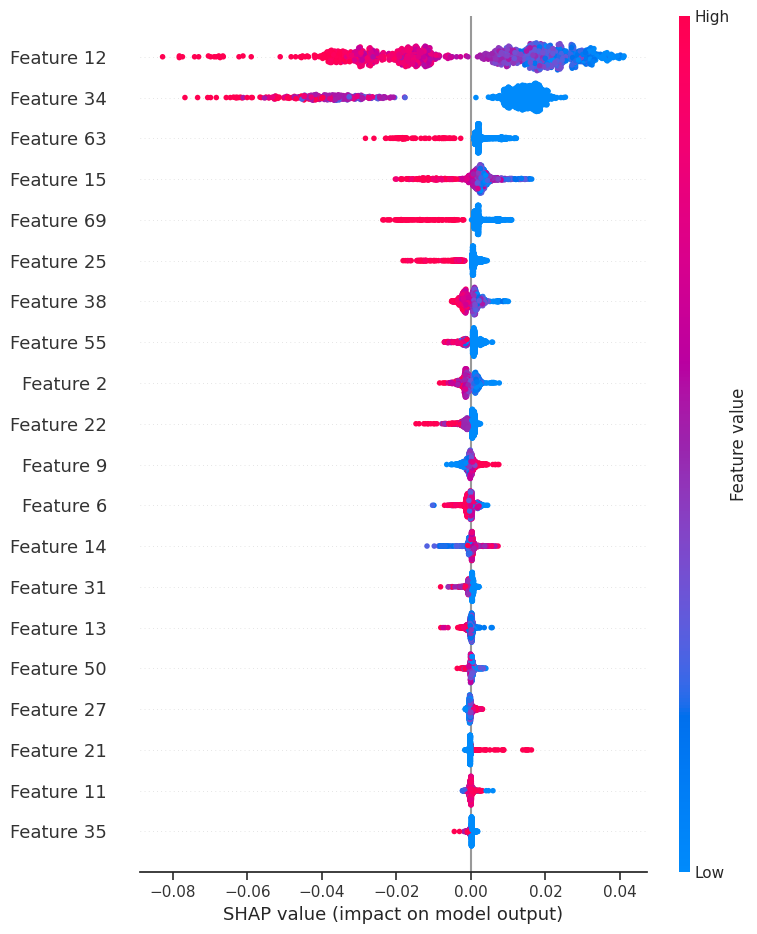

<Figure size 640x480 with 0 Axes>

In [ ]:
f, ax = plt.subplots(figsize=(13, 10))
shap.summary_plot(shap_values, x_test)
plt.savefig('scratch.png')
ax.figure.savefig("shap1Km.png",transparent=True)

Test Data Metrics:
R^2 Score: 0.2325386199824111
Mean Absolute Error: 0.03517990862446082
Mean Squared Error: 0.0017567064963769396
Root Mean Squared Error: 0.04191308263987439

Train Data Metrics:
R^2 Score: 0.277489286069309
Mean Absolute Error: 0.03421355097004015
Mean Squared Error: 0.0016467199058107815
Root Mean Squared Error: 0.04057979676896844


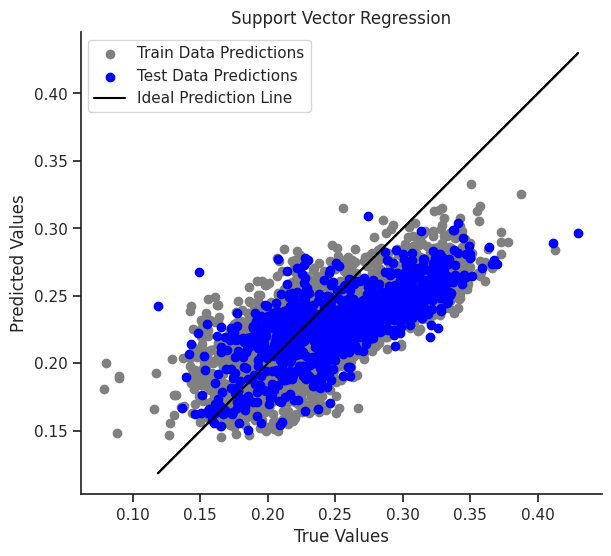

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import metrics

# Предположим, что df и df1 уже определены
# y = df[['gap']]
# x = df1

# Деление данных на обучающие и тестовые выборки
x_train, x_test, y_train, y_test = train_test_split(x, y.values.ravel(), test_size=0.2, random_state=0)

# Создание и обучение модели регрессии методом опорных векторов
svr_regressor = SVR(kernel='rbf')  # Используем радиальное базисное ядро (RBF)
svr_regressor.fit(x_train, y_train)

# Предсказание значений
y_pred = svr_regressor.predict(x_test)
y1_pred = svr_regressor.predict(x_train)

# Оценка метрик для тестовых данных
print('Test Data Metrics:')
print('R^2 Score:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Оценка метрик для обучающих данных
print('\nTrain Data Metrics:')
print('R^2 Score:', metrics.r2_score(y_train, y1_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))

# Визуализация результатов (если x одномерный)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y1_pred, color='gray', label='Train Data Predictions')
plt.scatter(y_test, y_pred, color='blue', label='Test Data Predictions')
plt.plot(y_test, y_test, color='black', label='Ideal Prediction Line')
plt.title('Support Vector Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn import metrics

# df и df1 уже определены
y = df[['gap']]
x = df1

# Деление данных на обучающие и тестовые выборки
x_train, x_test, y_train, y_test = train_test_split(x, y.values.ravel(), test_size=0.2, random_state=0)

# Определение ядра для гауссовского процесса
kernel = C(1.0) * RBF(length_scale=1.0)

# Создание и обучение модели регрессии на основе гауссовских процессов
gpr_regressor = GaussianProcessRegressor(kernel=kernel)
gpr_regressor.fit(x_train, y_train)

# Предсказание значений
y_pred = gpr_regressor.predict(x_test)
y1_pred = gpr_regressor.predict(x_train)

# Оценка метрик для тестовых данных
print('Test Data Metrics:')
print('R^2 Score:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Оценка метрик для обучающих данных
print('\nTrain Data Metrics:')
print('R^2 Score:', metrics.r2_score(y_train, y1_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))

# Визуализация результатов (если x одномерный)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y1_pred, color='gray', label='Train Data Predictions')
plt.scatter(y_test, y_pred, color='blue', label='Test Data Predictions')
plt.plot(y_test, y_test, color='black', label='Ideal Prediction Line')
plt.title('Gaussian Process Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

KeyboardInterrupt: 

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor #модель гауса
from sklearn.gaussian_process.kernels import RBF

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(x_train, y_train)
gaussian_process.kernel_

0.088**2 * RBF(length_scale=1.16)

In [72]:
df1

,A,B,mu,alpha,u0,cv,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,SPS,...,fr_NH1,fr_aldehyde,fr_allylic_oxid,fr_amide,fr_aryl_methyl,fr_bicyclic,fr_epoxide,fr_ketone,fr_methoxy,fr_piperdine
0,5.99438,2.27301,4.5933,55.81,-323.338627,21.459,8.311944,0.263889,-0.263889,53.857143,...,0,0,0,0,0,1,0,0,0,0
1,2.32923,0.75737,3.4068,77.34,-458.914682,35.183,9.588026,0.139722,-0.847037,11.333333,...,0,1,0,0,0,0,0,0,1,0
2,2.71950,1.23126,1.2920,76.75,-438.996978,32.710,8.328809,0.371204,0.371204,50.333333,...,0,0,0,0,0,1,0,0,1,0
3,2.29944,0.85305,3.1488,79.50,-422.988608,36.895,9.846767,0.043009,-0.043009,12.000000,...,0,1,0,0,0,0,0,0,0,0
4,3.03493,1.26316,1.9135,77.81,-435.272093,32.448,7.125972,0.075231,0.075231,17.000000,...,2,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.81953,0.95253,5.6157,77.77,-401.969669,33.153,10.285547,0.059792,-0.059792,20.333333,...,0,1,0,0,0,0,0,0,0,0
4996,4.22393,1.23139,1.2093,78.14,-403.082393,30.043,5.502454,0.638843,0.638843,61.000000,...,0,0,0,0,0,0,0,0,0,0
4997,2.40023,1.44261,2.0425,81.95,-404.332161,36.045,9.186319,0.017407,-0.017407,63.666667,...,0,0,0,0,0,1,0,0,0,1
4998,8.05652,1.25277,4.1565,58.08,-414.713710,23.621,9.590000,0.222222,0.222222,8.500000,...,1,0,0,0,0,0,0,0,0,0


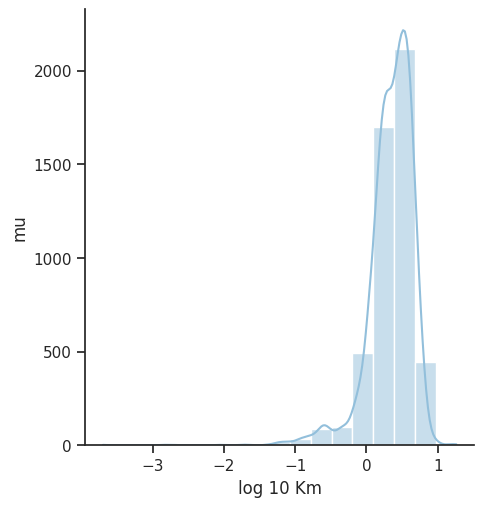

In [74]:
x=np.log10(df1.loc[:,'mu'].values)
g=sns.displot(x=x, kde=True, color='#92BFDB', binwidth=0.3)
g.set_axis_labels('log 10 Km', 'mu')

Test Data Metrics:
R^2 Score: 0.8052683540024644
Mean Absolute Error: 0.014819399999999998
Mean Squared Error: 0.00044573754
Root Mean Squared Error: 0.021112497246891473

Train Data Metrics:
R^2 Score: 1.0
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


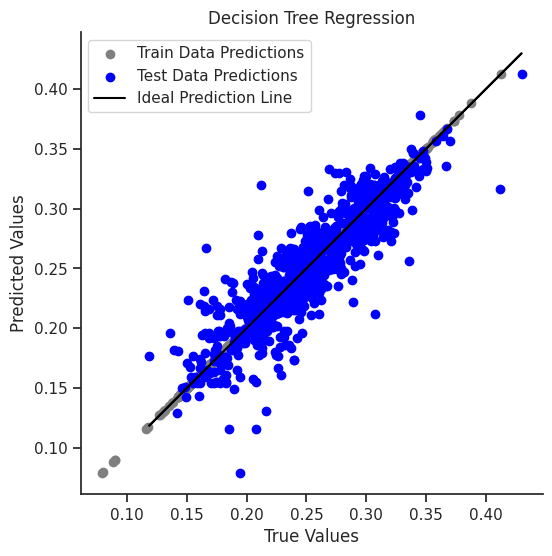

In [80]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Создание и обучение модели дерева решений для регрессии
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(x_train, y_train)

# Предсказание значений
y_pred = dt_regressor.predict(x_test)
y1_pred = dt_regressor.predict(x_train)

# Оценка метрик для тестовых данных
print('Test Data Metrics:')
print('R^2 Score:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Оценка метрик для обучающих данных
print('\nTrain Data Metrics:')
print('R^2 Score:', metrics.r2_score(y_train, y1_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))

# Визуализация результатов (если x одномерный)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y1_pred, color='gray', label='Train Data Predictions')
plt.scatter(y_test, y_pred, color='blue', label='Test Data Predictions')
plt.plot(y_test, y_test, color='black', label='Ideal Prediction Line')
plt.title('Decision Tree Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

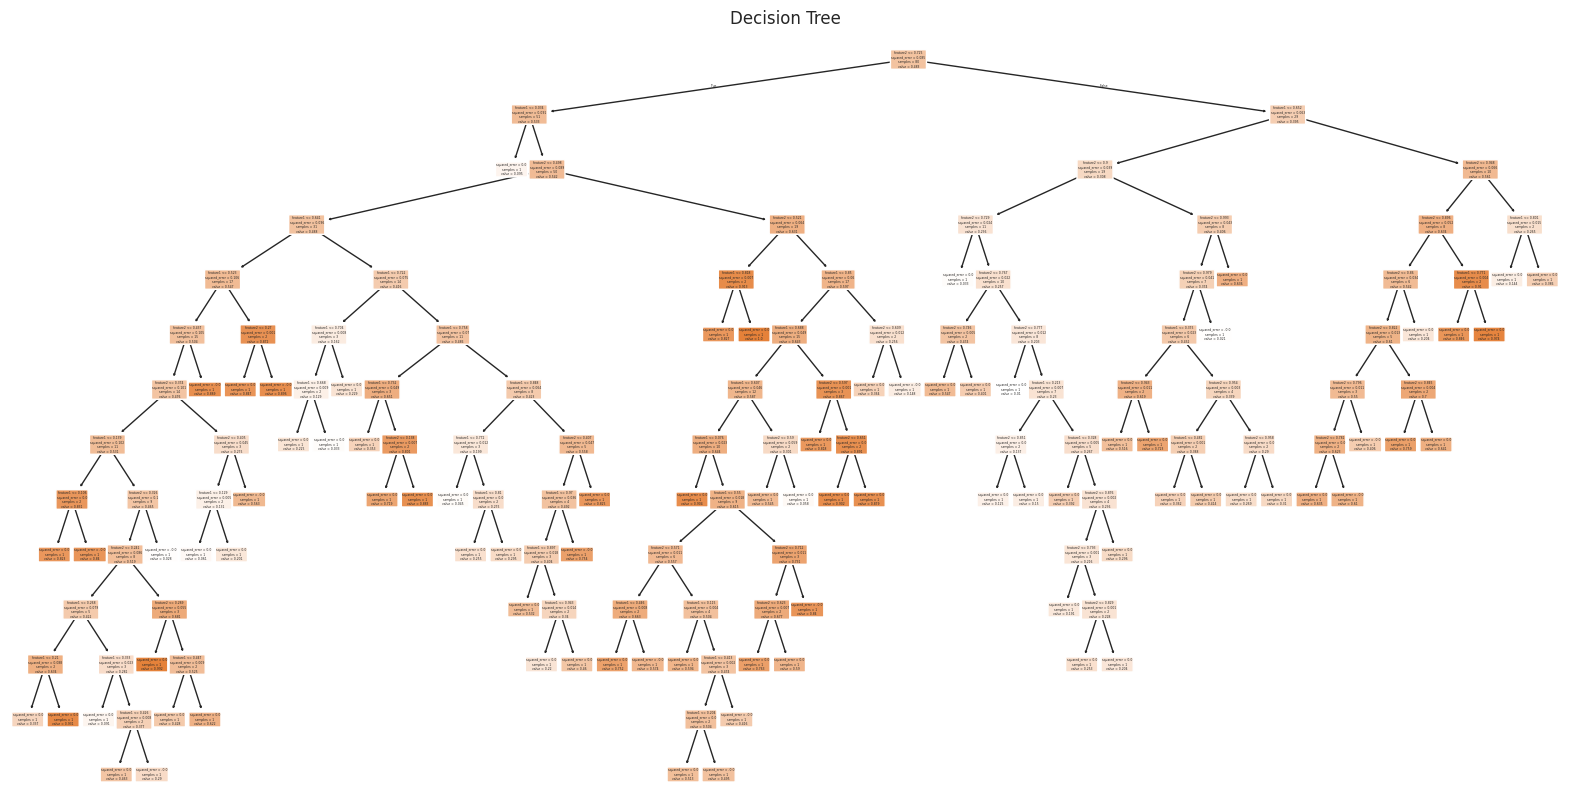

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Определение целевой переменной и признаков
y = df[['gap']]
x = df.drop(columns=['gap'])

# Деление данных на обучающие и тестовые выборки
x_train, x_test, y_train, y_test = train_test_split(x, y.values.ravel(), test_size=0.2, random_state=0)

# Создание и обучение модели дерева решений для регрессии
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(x_train, y_train)

# Визуализация дерева решений
plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, filled=True, feature_names=x.columns, rounded=True)
plt.title('Decision Tree')
plt.show()

Confusion Matrix:
[[6 5]
 [4 5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.55      0.57        11
           1       0.50      0.56      0.53         9

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20



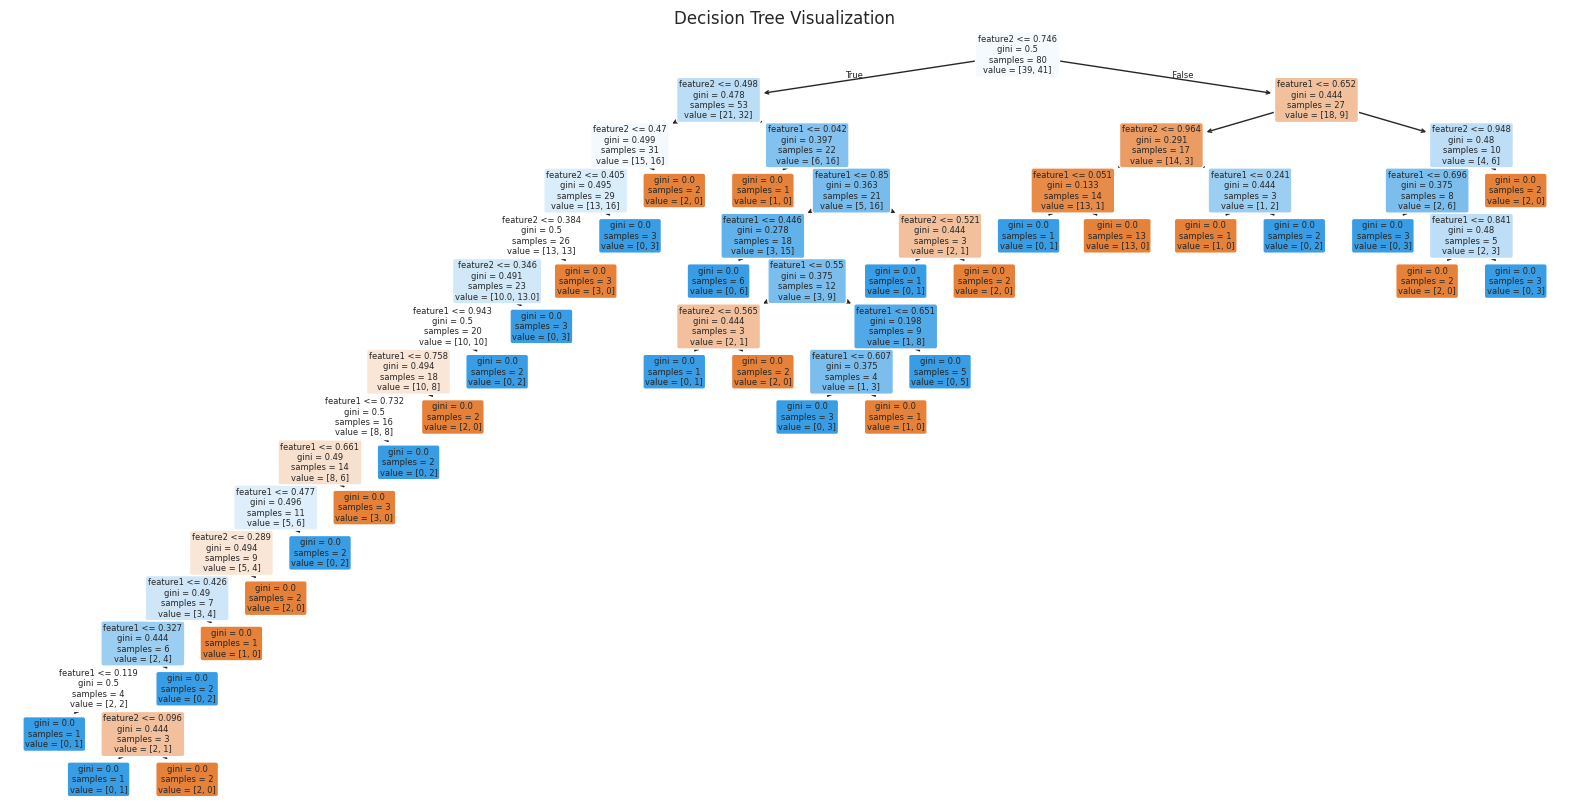

In [94]:
#задание 1.2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

# Создание классов на основе значений gap
threshold = df['gap'].median()  # Используем медиану как порог
df['class'] = (df['gap'] > threshold).astype(int)  # 0 - низкий gap, 1 - высокий gap

# Определение целевой переменной и признаков
y = df['class']
x = df.drop(columns=['gap', 'class'])

# Деление данных на обучающие и тестовые выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Создание и обучение модели дерева решений для классификации
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(x_train, y_train)

# Предсказание классов на тестовой выборке
y_pred = dt_classifier.predict(x_test)

# Оценка модели
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Визуализация дерева решений
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=x.columns, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

Логистическая регрессия:
[[ 6  1]
 [12  1]]
              precision    recall  f1-score   support

           0       0.33      0.86      0.48         7
           1       0.50      0.08      0.13        13

    accuracy                           0.35        20
   macro avg       0.42      0.47      0.31        20
weighted avg       0.44      0.35      0.25        20

Дерево решений:
[[3 4]
 [5 8]]
              precision    recall  f1-score   support

           0       0.38      0.43      0.40         7
           1       0.67      0.62      0.64        13

    accuracy                           0.55        20
   macro avg       0.52      0.52      0.52        20
weighted avg       0.56      0.55      0.56        20

Случайный лес:
[[3 4]
 [6 7]]
              precision    recall  f1-score   support

           0       0.33      0.43      0.38         7
           1       0.64      0.54      0.58        13

    accuracy                           0.50        20
   macro avg       0.48

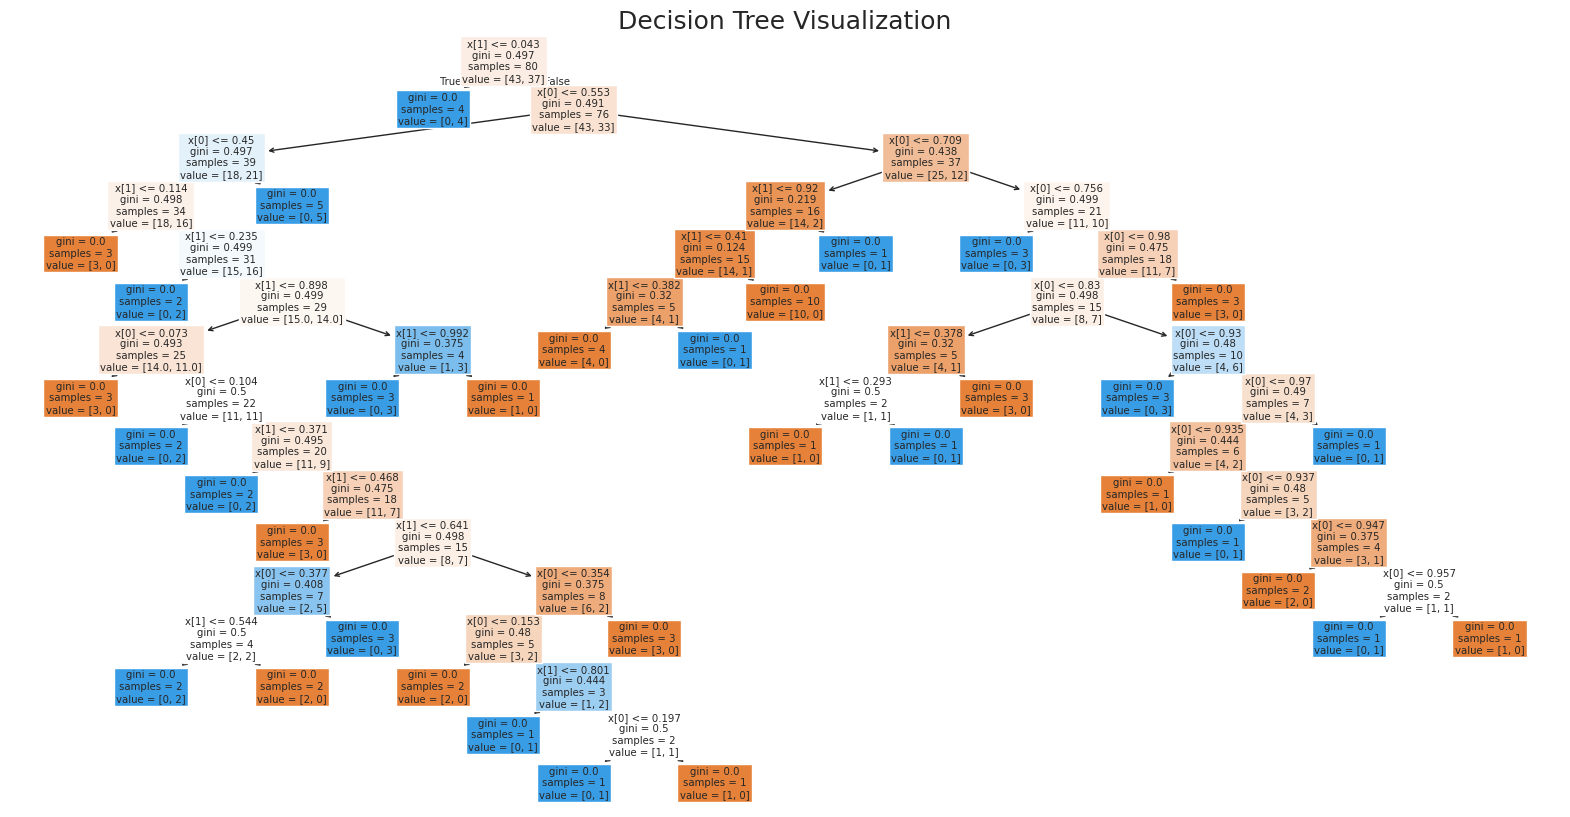

In [109]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Деление данных на обучающие и тестовые выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# 1. Логистическая регрессия
log_reg = LogisticRegression(random_state=0)
log_reg.fit(x_train, y_train)
y_pred_log_reg = log_reg.predict(x_test)

print("Логистическая регрессия:")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# 2. Дерево решений
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(x_train, y_train)
y_pred_dt = dt_classifier.predict(x_test)

print("Дерево решений:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# 3. Случайный лес
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(x_train, y_train)
y_pred_rf = rf_classifier.predict(x_test)

print("Случайный лес:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Оптимизация гиперпараметров для лучшей модели (например, Случайный лес)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(x_train, y_train)

# Лучшие параметры и оценка модели с оптимизированными гиперпараметрами
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(x_test)

print("Лучшие параметры для Случайного леса:", grid_search.best_params_)
print("Случайный лес с оптимизированными гиперпараметрами:")
print(confusion_matrix(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))

# Визуализация дерева решений (если нужно)
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True)
plt.title('Decision Tree Visualization')
plt.show()

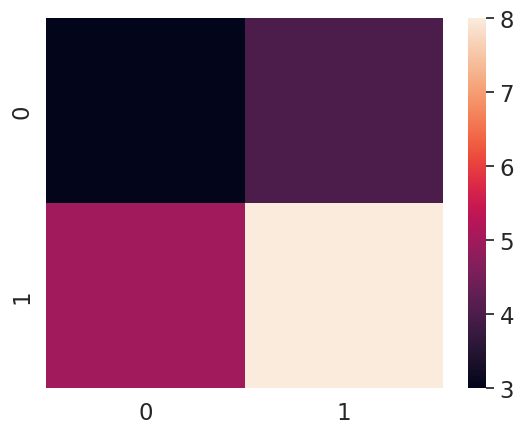

In [104]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


RFC = RandomForestClassifier(n_estimators = 100)
RFC.fit(x_train, y_train)

# Set Font Scale
sns.set(font_scale=1.5)


# Create Confusion Matrix
RFC_Prediction = RFC.predict(x_test)
Confusion_Matrix = confusion_matrix(y_test, RFC_Prediction)

# Plot the Heatmap
sns.heatmap(Confusion_Matrix);

In [105]:
print(f'Classification Report of Random Forest Classifier :')

print(f'\n{classification_report(y_test, RFC_Prediction)}')

print(f'\nClassification Report in form of Data Frame : ')

print(pd.DataFrame(classification_report(y_test, RFC_Prediction, output_dict=True)))

Classification Report of Random Forest Classifier :

              precision    recall  f1-score   support

           0       0.38      0.43      0.40         7
           1       0.67      0.62      0.64        13

    accuracy                           0.55        20
   macro avg       0.52      0.52      0.52        20
weighted avg       0.56      0.55      0.56        20


Classification Report in form of Data Frame : 
                  0          1  accuracy  macro avg  weighted avg
precision  0.375000   0.666667      0.55   0.520833      0.564583
recall     0.428571   0.615385      0.55   0.521978      0.550000
f1-score   0.400000   0.640000      0.55   0.520000      0.556000
support    7.000000  13.000000      0.55  20.000000     20.000000


Метрики качества модели:
Точность: 0.50
Полнота: 0.54
F1-мера: 0.58
ROC-AUC: 0.43


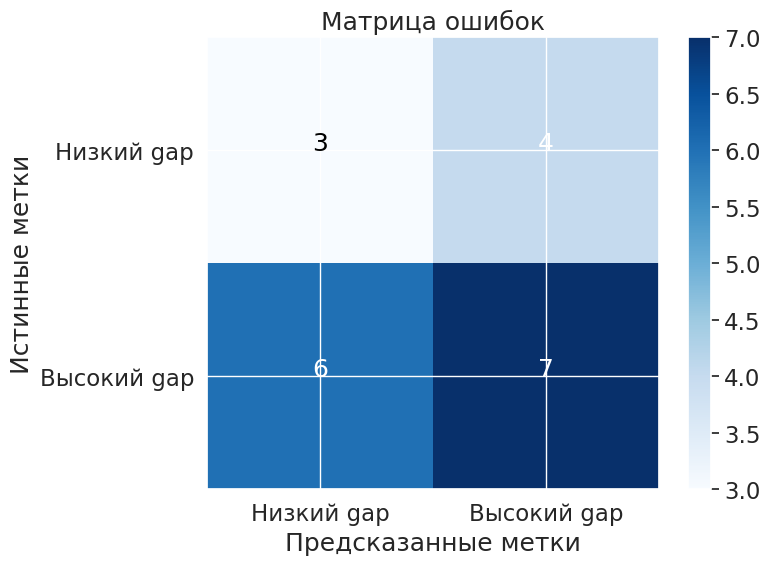

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_curve, roc_auc_score, accuracy_score,
                             precision_score, recall_score, f1_score)

# Обучение модели (например, Случайный лес)
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(x_train, y_train)
y_pred_rf = rf_classifier.predict(x_test)
y_pred_proba_rf = rf_classifier.predict_proba(x_test)[:, 1]  # Вероятности для ROC-AUC

# Вычисление метрик качества модели
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

print("Метрики качества модели:")
print(f"Точность: {accuracy:.2f}")
print(f"Полнота: {recall:.2f}")
print(f"F1-мера: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Визуализация матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Матрица ошибок')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Низкий gap', 'Высокий gap'])
plt.yticks(tick_marks, ['Низкий gap', 'Высокий gap'])

thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Истинные метки')
plt.xlabel('Предсказанные метки')
plt.tight_layout()
plt.show()

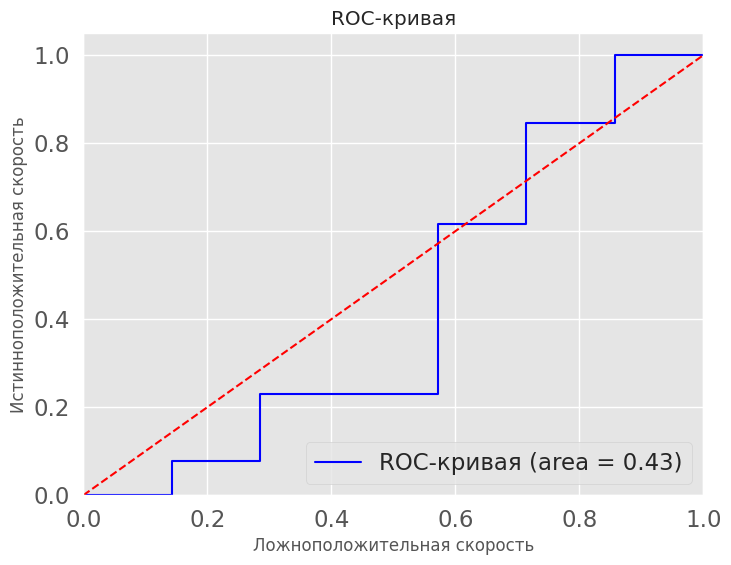

In [115]:
# Визуализация ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC-кривая (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительная скорость')
plt.ylabel('Истинноположительная скорость')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

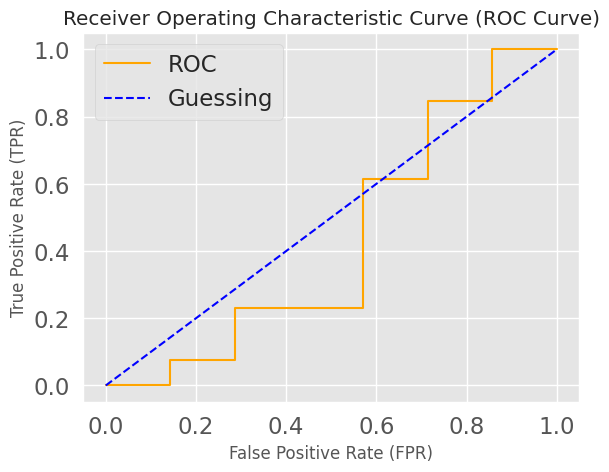

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve


# Обучение модели (например, Случайный лес)
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(x_train, y_train)

# Получение вероятностей предсказаний для ROC-кривой
y_pred_proba_rf = rf_classifier.predict_proba(x_test)[:, 1]  # Вероятности для положительного класса

# Вычисление FPR и TPR
FPR, TPR, thresholds = roc_curve(y_test, y_pred_proba_rf)

def Plot_ROC_Curve(FPR, TPR):
    '''
    Plots Receiver Operating Characteristic Curve (ROC Curve)

    Parameters
    ----------
    FPR : False Positive Rate.
    TPR : True Positive Rate.
    '''

    # Theme Style (изменено на ggplot)
    plt.style.use('ggplot')

    # Plot ROC Curve
    plt.plot(FPR, TPR, color='orange', label='ROC')

    # Plot Line with no Predictive Powers (Base Line)
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Guessing')

    # Customize the Plot
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic Curve (ROC Curve)')
    plt.legend()

    # Show the plot
    plt.show()

# Вызов функции для построения ROC-кривой
Plot_ROC_Curve(FPR, TPR)